In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data_df = pd.read_csv('data/ex1data2.txt',names=['size','rooms','price'])

In [11]:
data_df.head()

,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [12]:
data_df.describe()

,size,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [15]:
data = (data_df-data_df.mean())/data_df.std()

In [17]:
data.head()

,size,rooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [18]:
data.insert(2,'ones',1)

In [20]:
data.head()

,size,rooms,ones,price
0,0.130010,-0.223675,1,0.475747
1,-0.504190,-0.223675,1,-0.084074
2,0.502476,-0.223675,1,0.228626
3,-0.735723,-1.537767,1,-0.867025
4,1.257476,1.090417,1,1.595389


In [24]:
cols=data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [25]:
X.head()

,size,rooms,ones
0,0.130010,-0.223675,1
1,-0.504190,-0.223675,1
2,0.502476,-0.223675,1
3,-0.735723,-1.537767,1
4,1.257476,1.090417,1


In [26]:
y.head()

,price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [27]:
theta = np.matrix(np.array([0,0,0]))

In [29]:
theta

matrix([[0, 0, 0]])

In [33]:
def cost(X,y,theta):
    squared_error = np.power(((X*theta.T)-y),2)
    return np.sum(squared_error) / 2*len(X)*1.0

In [ ]:
X = np.matrix(X.values)

In [36]:
y = np.matrix(y.values)

In [40]:
cost(X,y,theta)

1081.0000000000002

In [41]:
def gradient_descent(X,y,theta,iters,learning_rate):
    temp = np.matrix(np.zeros(theta.shape))
    no_of_params = int(theta.ravel().shape[1])
    iter_cost = np.zeros(iters)
    
    for i in  range(iters):
        error = (X*theta.T)-y
        
        for j in range(no_of_params):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - (learning_rate/len(X))*np.sum(term)
        theta = temp
        iter_cost[i] = cost(X,y,theta)
        
    return theta,iter_cost

In [43]:
learning_rate = 0.01
iters = 1000

In [44]:
optimal_theta,optimal_cost = gradient_descent(X,y,theta,iters,learning_rate)

In [47]:
optimal_theta

matrix([[  8.78503652e-01,  -4.69166570e-02,  -1.10868761e-16]])

In [49]:
cost(X,y,optimal_theta)

288.72374346345111

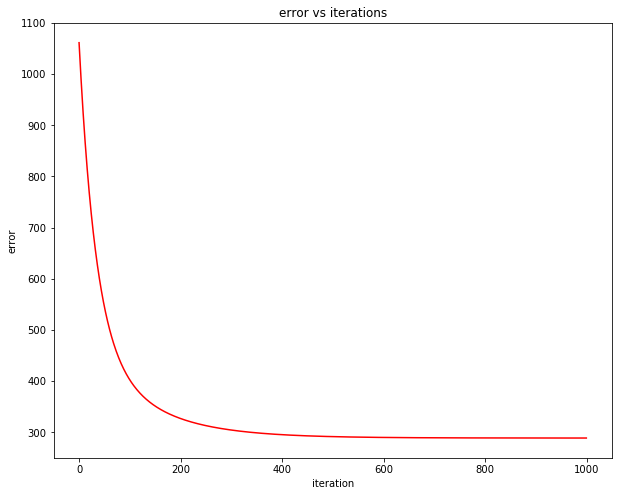

In [50]:
fig, ax =plt.subplots(figsize=(10,8))
ax.plot(np.arange(iters),optimal_cost,'r')
ax.set_xlabel('iteration')
ax.set_ylabel('error')
ax.set_title('error vs iterations')